In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import sys
import tensorflow as tf
import json
import cv2


sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))
from segment.data import input_fn
from segment.display import MergeImgAn

In [2]:
def display(img):
    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(1,1,1) 
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
record_dir = '../record'
trainingsetDescriptionFile = '{}/description.json'.format(record_dir)
trainingsetDescription = json.load(open(trainingsetDescriptionFile))

In [17]:
config = {
        'batch_size': 1,
        'trainingset': trainingsetDescription,
        'input_shape': [256, 512, 3],
        'augment_rotation' : 25., # Rotation in degrees
        'augment_flip_x': False,
        'augment_flip_y': True,
        'augment_brightness':0.,
        'augment_contrast': 0.,
        'augment_shift_x': 0.0, # in fraction of image - Unnecessary with random crop
        'augment_shift_y': 0.0, # in fraction of image - Unnecessary with random crop
        'scale_min': 0.75, # in fraction of image
        'scale_max': 1.25, # in fraction of image
        'ignore_label': trainingsetDescription['classes']['ignore'],
        'classes': trainingsetDescription['classes']['classes'],
        'image_crops': 1,
        'area_filter_min': 25,
        'epochs': 1,
        }

In [18]:
train_dataset = input_fn(True, record_dir, config)
test_dataset = input_fn(False, record_dir, config)

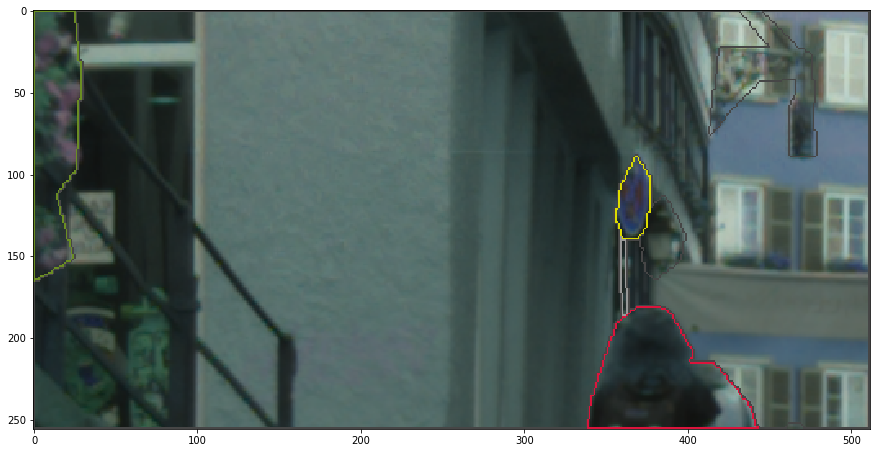

In [31]:
iman = MergeImgAn(train_dataset, config)
display(iman[0])

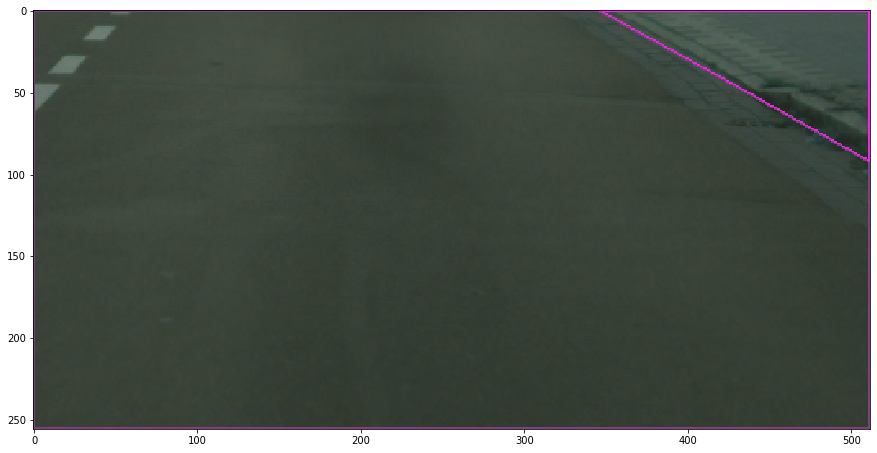

In [36]:
iman = MergeImgAn(test_dataset, config)
display(iman[0])